# Neural Networks Assignment

### Question 1:  <a id='q3'> </a>
Using a single neural network with 500 hidden units (and only one hidden layer) fit the data. For fitting try using different numbers of epochs. Try values on the range of 1 to 100 (if this is taking too long try every other number). Plot out the train and test set accuracy. In one to two sentences what pattern do you see? In one sentence why is this pattern happening?

[63.69565217391304, 65.43478260869566, 66.73913043478261, 68.91304347826087, 68.69565217391305, 69.56521739130434, 69.56521739130434, 69.78260869565217, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.1304347826087, 69.1304347826087, 69.1304347826087, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.34782608695652, 69.1304347826087, 69.34782608695652, 69.56521739130434, 69.78260869565217, 70.0, 70.0, 70.0, 70.0, 70.21739130434783, 70.43478260869566, 70.21739130434783, 70.65217391304348, 70.65217391304348, 71.08695652173913, 71.30434782608695, 71.52173913043478, 71.73913043478261, 71.73913043478261, 71.95652173913044, 71.95652173913044, 72.3913043478261, 72.82608695652173, 72.82608695652173, 73.04347826086956, 73.47826086956522, 73.91304347826086, 73.91304347826086, 73.69565217391305, 73.91304347826086, 73.69565217391305, 73.69565217391305, 73.91304347826086, 73.91304347

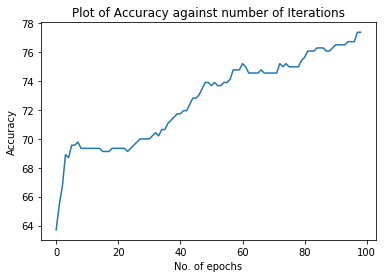

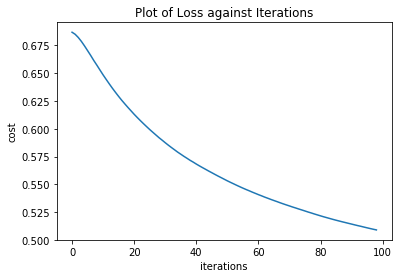

In [10]:
'''
Exercise Data
'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

data = pd.read_csv("db.csv")

ex_X = data.iloc[:,0:7]
ex_y = data.iloc[:,8]

random_state = np.random.RandomState(10)
n_samples, n_features = ex_X.shape
ex_X = ex_X + (random_state.randn(n_samples, n_features))

X_train, X_test, y_train, y_test = train_test_split( ex_X, ex_y, test_size=0.4, random_state=3)

#Transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

accs= []
for i in range(1,100):
    model = MLPClassifier(hidden_layer_sizes=(500), max_iter=i, 
                     solver='sgd', random_state=21, alpha=0.0001)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accs.append(100 * model.score(X_train,y_train))

print(accs)

#Plots
#plots are at the very bottom of output
plt.plot(accs)
plt.ylabel("Accuracy")
plt.xlabel("No. of epochs")
plt.title("Plot of Accuracy against number of Iterations")
plt.show()

#plot of cost function
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Plot of Loss against Iterations")
plt.plot(model.loss_curve_)
plt.show()

warnings.filterwarnings("ignore")

We can see that the accuracy increases quite significantly as we start increasing the number of epochs. From 1 epoch to around 5, there is a large jump in accuracy. Further increasing the number of epochs, the accuracy seems to increase until we reach 77%.
 Since Epochs is the back propagation and each back propagation pass makes an adjustment to the weights of the model, as we increase the number of rounds we do this (epochs), we are increasing accuracy as well

### Question 2:  <a id='q3'> </a>
Fit a single layer neural network using the default number of epochs. Try using various numbers of hidden units (we suggest 10, 20, 30 ... , 500 (if this is taking too long you can increase the step size)). Plot out the train and test set accuracy. In one to two sentences what pattern do you see? In one sentence why is this pattern happening?

[68.91304347826087, 75.8695652173913, 76.95652173913044, 77.17391304347827, 77.6086956521739, 78.26086956521739, 78.47826086956522, 77.6086956521739, 77.39130434782608, 76.73913043478261, 78.91304347826087, 77.17391304347827, 78.47826086956522, 78.47826086956522, 78.91304347826087, 78.04347826086956, 78.04347826086956, 77.39130434782608, 78.69565217391305, 78.69565217391305, 78.69565217391305, 77.6086956521739, 78.26086956521739, 78.91304347826087, 77.6086956521739, 77.82608695652173, 77.39130434782608, 77.39130434782608, 77.39130434782608, 78.91304347826087, 77.6086956521739, 77.6086956521739, 77.82608695652173, 78.69565217391305, 78.26086956521739, 78.26086956521739, 78.04347826086956, 77.6086956521739, 77.82608695652173, 78.04347826086956, 77.6086956521739, 77.6086956521739, 78.04347826086956, 79.13043478260869, 78.04347826086956, 78.47826086956522, 78.04347826086956, 77.82608695652173, 78.47826086956522, 77.82608695652173]


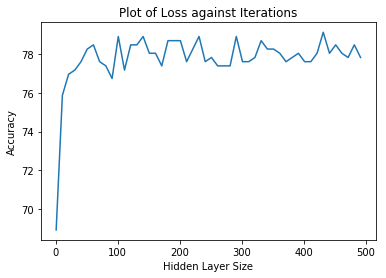

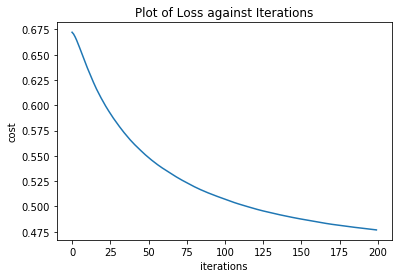

In [13]:
accs = []
for i in range(1,500, 10):
    model = MLPClassifier(hidden_layer_sizes=(i), alpha=0.0001,
                     solver='sgd', random_state=21)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accs.append(100 * model.score(X_train,y_train))

print(accs)

#Plots
#plots are at the very bottom of output

x = np.arange(1,500,10)
plt.plot(x,accs)
plt.ylabel("Accuracy")
plt.xlabel("Hidden Layer Size")
plt.title("Plot of Loss against Iterations")
plt.show()

#plot of cost function
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Plot of Loss against Iterations")
plt.plot(model.loss_curve_)
plt.show()

warnings.filterwarnings("ignore")

From zero to 100 layers, there is a jump in accuracy and after adding about 100 layers, the accuracy seems to fluctuate about 78% and adding more layers has almost no effect in accuracy. This is because adding more layers after a certain point reaches the limits of the sigmoid function and shows no improvements. 